Компания Airbnb использует сведения об апортаментах для того, чтобы улучшить путешествия туристов или жителей города. Для того, чтобы понять, какие апартаменты более популярны, был произведен анализ данных с сайта данной компании и выявлены некоторые закономерности в цене и доступности жилья, что напрямую влияет на их популярность

Данные представляют собой информацию о арендадателе, географическом местоположении, основные характеристики жилья и сведения об отзывах.

**Необходимо понять, какие апартаменты наиболее востребованы.**

**Описание атрибутов**

id - порядковый номер арендадателя

name - краткое описание жилья

host_id - номер хоста

host_name - имя владельца хоста

neighbourhood_group - район, в котором находится квартира

neighbourhood - тип местности

latitude - широта

longitude - долгота

room_types - тип жилья

price - цена за ночь

minimum_nights - минимальное количество ночей для аренды

number_of_reviews - количество отзывов

last_review - дата последнего отзыва

reviews_per_month - среднее количество отзывов в месяц

calculated_host_listings_count - количество броней

availability_365 - количество дней в году, когда квартира свободна

# Первый взгляд на данные

In [1]:
# Импорт необходимых библиотек для дальнейшего анализа
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
import seaborn as sns

In [2]:
# Загрузка данных
data = pd.read_csv('airbnb.csv')

In [3]:
# Посмотрим на начало данных
data.head(3)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365


In [4]:
# Размер нашего Data Frame
data.shape

(48895, 16)

In [5]:
# Описание для численных атрибутов
data.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [6]:
# Типы данных атрибудов
data.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

# Понимание и очистка данных

Уже на этом этапе анализа мы видим некоторые пропущенные значения.

Давайте найдем их количество по каждому атрибуту

In [7]:
# Атрибуты, содержащие пропущенные значения, отмечены в unique == 2, так как имеют и True, и False
data.isnull().describe()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
count,48895,48895,48895,48895,48895,48895,48895,48895,48895,48895,48895,48895,48895,48895,48895,48895
unique,1,2,1,2,1,1,1,1,1,1,1,1,2,2,1,1
top,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
freq,48895,48879,48895,48874,48895,48895,48895,48895,48895,48895,48895,48895,38843,38843,48895,48895


In [8]:
# Функция sum производит сложение всех True элементов
data.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

Мы видим, что в атрибутах "last_review" и "reviews_per_month" одинаковые значения количества пропущенных элементов. 

In [9]:
# В скольки случаях пропущены значения одновременно в last_review и reviews_pre_month
data.loc[(data.last_review.isnull())
         & (data.reviews_per_month.isnull())].shape[0]

10052

Как мы можем заметить, для каждого пропущенного элемента "last_review" пропущен элемент "reviews_per_month". Это может говорить о том, что данные атрибуты зависимы

In [10]:
data.loc[data.last_review.isnull(), 'number_of_reviews'].unique()

array([0], dtype=int64)

В действительности, пропущенные значения появились из-за того, что отзывы на то или иное жилье отсутствуют.

"last_review" - дата, значит в рамках задачи она не влияет на вопрос того, какие апартаменты популярны для аренды

"reviews_per_month" - число отзывов в месяц, а так как отзывов в каждом случае 0, то все пропущенные значения могут быть заменены на 0.

"name" и "host_name" так же нам не важны для анализа

In [11]:
# Удалим элементы, не представляющие важности для нашего анализа
data.drop(['id', 'host_name', 'last_review'], axis=1, inplace=True)

In [12]:
# Заполним пропущенные значения reviews_per_month нулями
data['reviews_per_month'].fillna(0, inplace=True)

In [13]:
data.head(3)

,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Clean & quiet apt home by the park,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,Skylit Midtown Castle,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,THE VILLAGE OF HARLEM....NEW YORK !,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0.00,1,365


In [14]:
data.reviews_per_month.isnull().sum()

0

Давайте рассмотрим уникальные значения элементов некоторых атрибутах, это полезно для дальшейшего анализа

In [15]:
# Данный атрибут представляет собой тип квартиры
data.room_type.unique()

array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

In [16]:
# Данный атрибут представляет собой район, в котором находится та или иная квартира
data.neighbourhood_group.unique()

array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

In [17]:
# Данный атрибут представляет собой окрестность того или иного района
data.neighbourhood.unique().shape[0]

221

Понимание уникальных значений данных атрибутов и их сопоставление помогут нам для формирования вывода о популярности апартаментов

# Анализ и визуализация данных

**Анализ статистических значений и корреляций между некоторыми признаками**

## Где больше всего мест для аренды? Как они отличаются по цене, по отзывам?

У нас есть 5 районов: Brooklyn, Manhattan, Queens, Staten Island, Bronx

Рассмотрим их по отдельности

In [18]:
#Brooklyn
brooklyn = data.loc[data['neighbourhood_group'] == 'Brooklyn']

#Manhattan
manhattan = data.loc[data['neighbourhood_group'] == 'Manhattan']

#Queens
queens = data.loc[data['neighbourhood_group'] == 'Queens']

#Staten Island
staten_island = data.loc[data['neighbourhood_group'] == 'Staten Island']

#Bronx
bronx = data.loc[data['neighbourhood_group'] == 'Bronx']

In [19]:
num_places = pd.DataFrame({
    'Areas': ['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
    'num': [
        brooklyn.shape[0], manhattan.shape[0], queens.shape[0],
        staten_island.shape[0], bronx.shape[0]
    ]
})
num_places.sort_values(by='num').reset_index(drop=True)

,Areas,num
0,Staten Island,373
1,Bronx,1091
2,Queens,5666
3,Brooklyn,20104
4,Manhattan,21661


Как мы можем заметить, в Манхеттене самое большое количество мест для аренды. Возможно, это связано с ценой на жилье, давайте посмотрим

In [20]:
#Рассмотрим распределение цен в районах
prices_diff = pd.DataFrame()
for df, name in zip(
    [brooklyn, manhattan, queens, staten_island, bronx],
    ['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx']):
    prices_diff = pd.concat([
        prices_diff,
        pd.DataFrame(df['price'].describe().iloc[3:]).\
            rename(columns={'price': name})
    ],axis=1)
prices_diff

,Brooklyn,Manhattan,Queens,Staten Island,Bronx
min,0.0,0.0,10.0,13.0,0.0
25%,60.0,95.0,50.0,50.0,45.0
50%,90.0,150.0,75.0,75.0,65.0
75%,150.0,220.0,110.0,110.0,99.0
max,10000.0,10000.0,10000.0,5000.0,2500.0


В Манхеттене самое дорогое жилье, что отличает его от всех остальных районов своей рентабельностью, а значит и количество мест для аренды вполне обоснованно.

Так же можно заметить, что цены на жилье в Queens и Staten Island статистически практически не отличаются, возможно это связано с похожими условиями проживания или качеством жилья.

Самый дешевый район - Bronx. Возможно это связано с условиями проживания(преступность и т.д)

Визуализируем плотность и распределение цен при помощи библиотеки seaborn

In [21]:
#Установим размеры для этого и последующих графиков
sns.set(rc={'figure.figsize': (15, 10)})

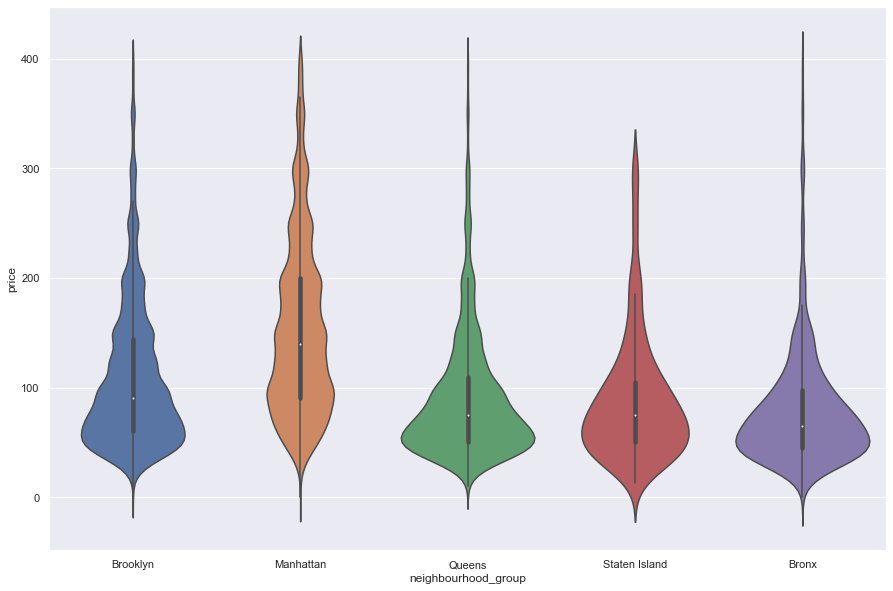

In [22]:
#График визуализации
sns.violinplot(data=data.loc[data.price < 400],
               x='neighbourhood_group',
               y='price')

При увеличении границы цены, графики будут сужаться в сторону нуля, поэтому при значении 400 форма видна наиболее четко.

Исходя из этого, можно сделать вывод, что Манхеттен - действительно самый дорогой район для проживания.

Посмотрим на количество отзывов

In [23]:
#Рассмотрим распределение общего количества отзывов по районам
num_review_diff = pd.DataFrame()
for df, name in zip(
    [brooklyn, manhattan, queens, staten_island, bronx],
    ['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx']):
    num_review_diff = pd.concat([
        num_review_diff,
        pd.DataFrame(df['number_of_reviews'].describe().iloc[3:]).\
            rename(columns={'number_of_reviews': name})
    ],axis=1)
num_review_diff

,Brooklyn,Manhattan,Queens,Staten Island,Bronx
min,0.0,0.0,0.0,0.0,0.0
25%,1.0,1.0,1.0,1.0,1.0
50%,6.0,4.0,7.0,12.0,9.0
75%,25.0,19.0,32.0,42.0,32.0
max,488.0,607.0,629.0,333.0,321.0


In [24]:
#Рассмотрим распределение количества отзывов в месяц по районам
reviews_per_month_diff = pd.DataFrame()
for df, name in zip(
    [brooklyn, manhattan, queens, staten_island, bronx],
    ['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx']):
    reviews_per_month_diff = pd.concat([
        reviews_per_month_diff,
        pd.DataFrame(df['reviews_per_month'].describe().iloc[3:]).\
            rename(columns={'reviews_per_month': name})
    ],axis=1)
reviews_per_month_diff

,Brooklyn,Manhattan,Queens,Staten Island,Bronx
min,0.00,0.00,0.0000,0.00,0.00
25%,0.05,0.02,0.0800,0.26,0.12
50%,0.38,0.28,0.7600,1.00,0.87
75%,1.55,1.30,2.3075,2.31,2.36
max,14.00,58.50,20.9400,10.12,10.34


Как мы можем видеть, статистически, самое большое общее количество и количество отзывов в месяц у Staten Island, несмотря на то, что у Manhattan и Queens рекордное количество отзывов у одного объявления, скорее всего они принадлежат самым популярным отелям в данных районах.

## Где находятся самые дорогие апартаменты? А дешевые? Как влияет местоположение на стоимость аренды?

Как мы уже заметили, самые дорогие апартаменты находятся в Манхеттене, а дешевые в Бронксе. Так, например средняя цена за ночь в Манхеттанских аппартаментах равна $90, а в Бронксе 65.

Если исходить из того, что местоположение - район, то можно сделать вывод: местоположение апартаментов значительно влияет на их стоимость

Но все же, давайте взглянем на цену в зависимости от координат

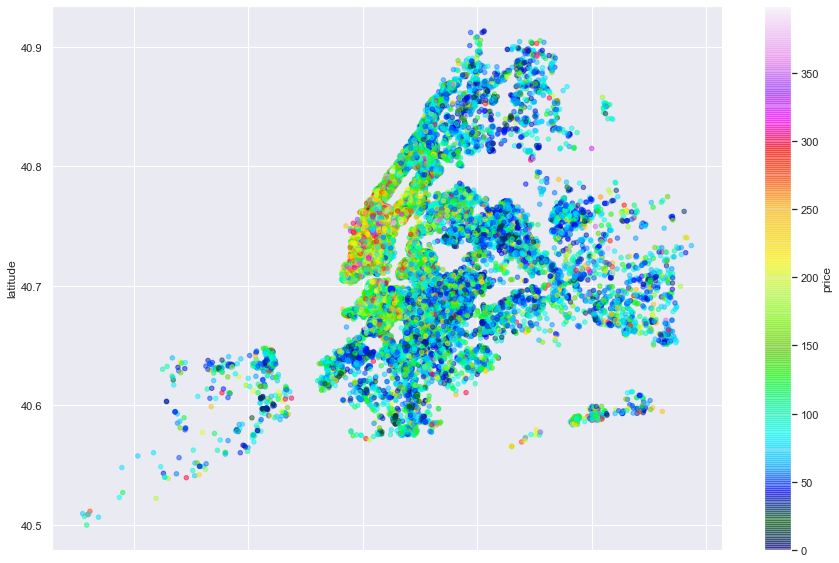

In [25]:
data.loc[data.price < 400].plot(kind='scatter',
                                x='longitude',
                                y='latitude',
                                c='price',
                                cmap=plt.get_cmap('gist_ncar'),
                                alpha=0.5,
                                figsize=(15, 10))

На данном графике очевидно различим город и виден район Манхеттен, который разположен примерно в центре графика.

Можно заметить, что остальное распределение цен достаточно неоднородно и к северу от Манхеттена цена явно начинает падать, там находится район Брукс

## Зависит ли минимальный срок аренды от местоположения и типа жилья?

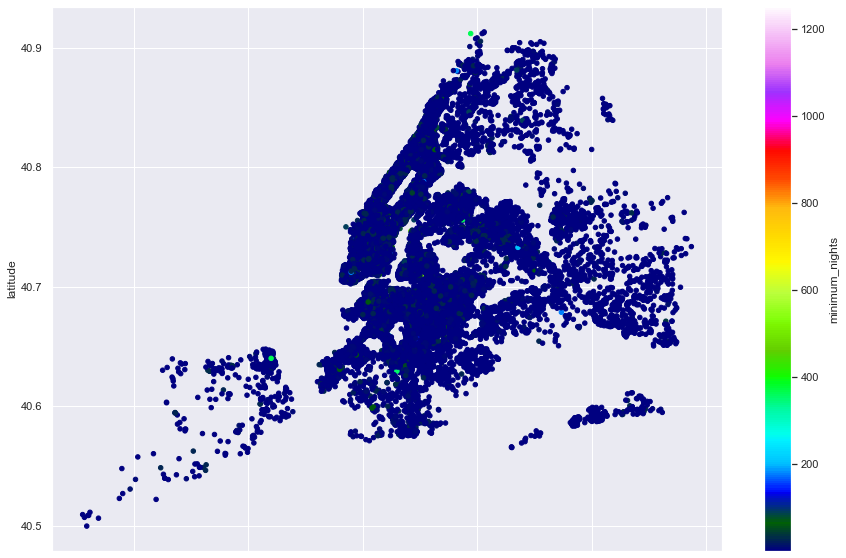

In [26]:
#Зависимость минимального срока аренды от местоположения
data.plot(kind='scatter',
          x='longitude',
          y='latitude',
          c='minimum_nights',
          cmap=plt.get_cmap('gist_ncar'),
          figsize=(15, 10))

Из графика следует, что в принципе местоположение не влияет на минимальный срок аренды жилья, для каждого из апартаментов владелец сам решает чему будет равна эта цифра, нет никакой видимой статистической зависимости.

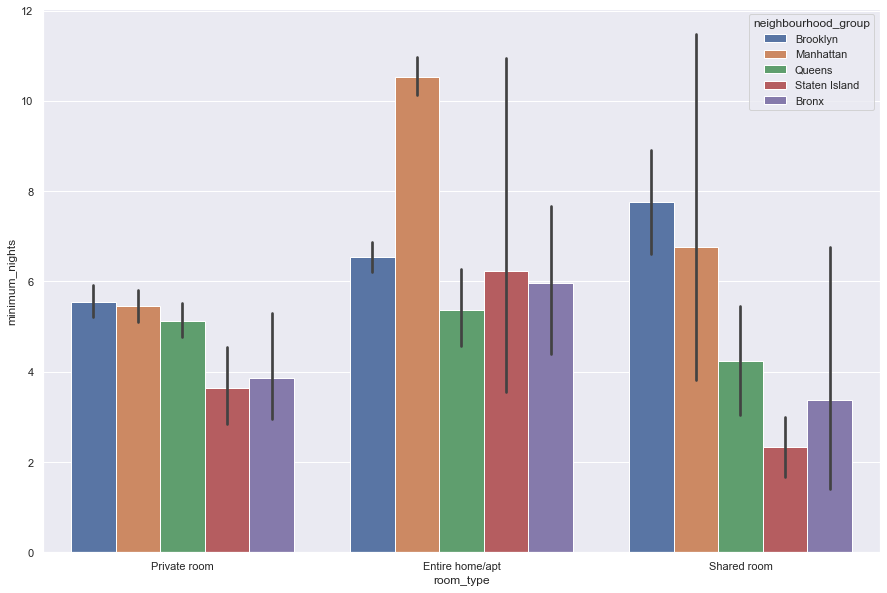

In [27]:
sns.barplot(x="room_type",
            y="minimum_nights",
            hue="neighbourhood_group",
            data=data)

Из графика видно, что тип арендуемого жилья действительно влияет на минимальное количество дней аренды.

Особенно эта зависимость видна на примере Манхеттена, в котором минимальный срок аренды целого дома составляет около 10 дней, в то время как арендовать комнату можно на 5 дней.

## Какие хосты наиболее заняты в течение года? Сделайте предположение почему.

In [28]:
#Возьмем все хосты, занятые круглый год
availible_hosts = data.groupby('host_id').\
    agg({'availability_365': 'mean'}).\
    sort_values(by=['availability_365', 'host_id']).reset_index()
availible_hosts = availible_hosts[availible_hosts.availability_365 == 0]

Взглянем на их расположение

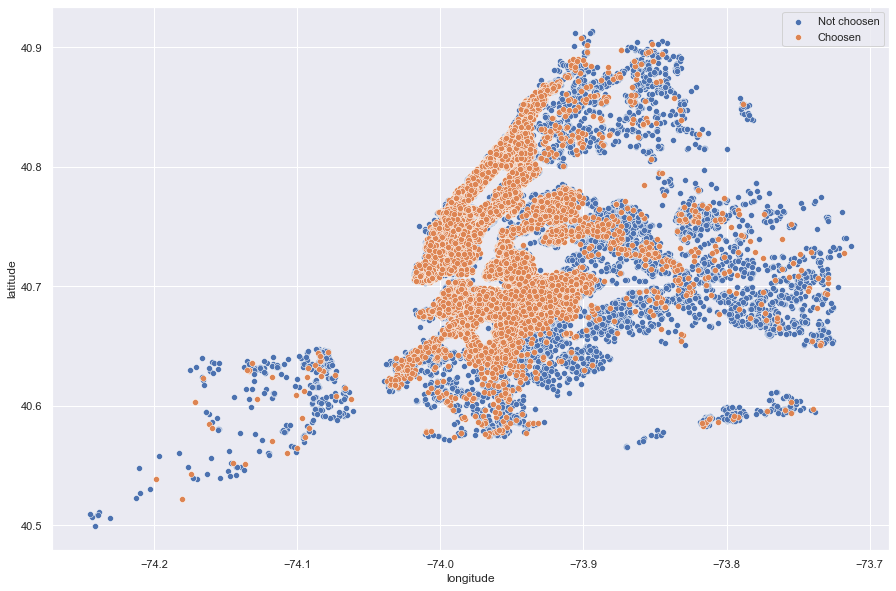

In [29]:
sns.scatterplot(x='longitude',
                y='latitude',
                data=data.loc[~data.host_id.isin(availible_hosts.host_id)],
                label='Not choosen')
sns.scatterplot(x='longitude',
                y='latitude',
                data=data.loc[data.host_id.isin(availible_hosts.host_id)],
                label='Choosen')

Исходя из графика, самые занятые хосты распределены по всему городу, возможно это связано с тем, что их либо купили, либо арендовали на неопределенный срок

Я думаю, что дело не в цене и отчасти не в типе жилья, взглянем на то, сколько хозяев было у таких апартаментов

Text(0, 0.5, 'count flats')

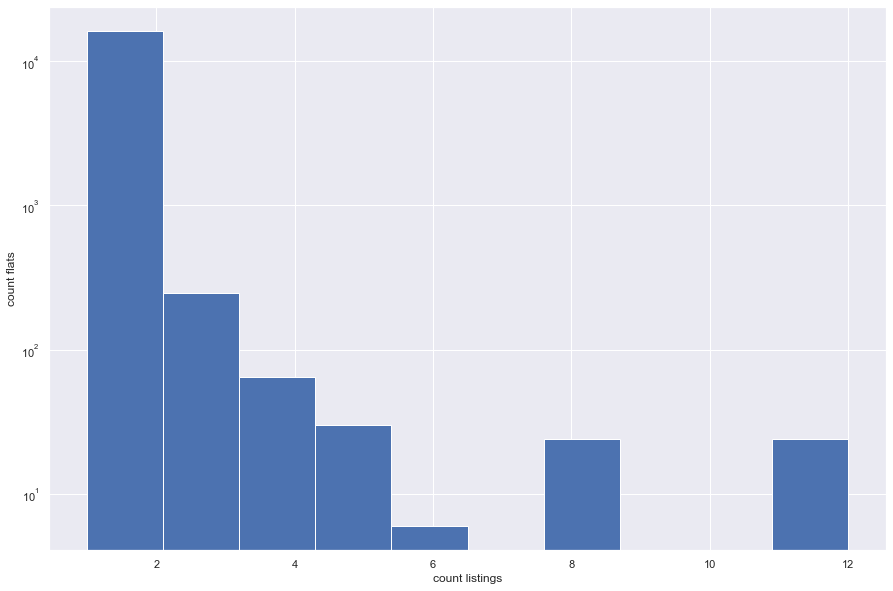

In [30]:
#Распределение количества вхождений того или иного количества броней
data.loc[data.host_id.isin(availible_hosts.host_id)].\
    calculated_host_listings_count.hist(log = True)
plt.xlabel('count listings')
plt.ylabel('count flats')

In [31]:
data.loc[data.host_id.isin(availible_hosts.host_id)].\
    calculated_host_listings_count.value_counts()

1     14910
2      1256
3       246
4        64
5        30
12       24
8        24
6         6
Name: calculated_host_listings_count, dtype: int64

Как видим, большинство квартир хостов имеют только одного "владельца", поэтому они заняты круглый год

## Какие по цене квартиры имеют наименьшее количество свободных дней в году?

In [32]:
#Возьмем все квартиры занятые круглый год
availible_apartments = data[data.availability_365 == 0].\
    sort_values(by=['host_id']).reset_index(drop=True)

Посмотрим на распределение цены на такие апартаменты

In [33]:
availible_apartments.price.describe()

count    17533.000000
mean       136.032111
std        211.228093
min          0.000000
25%         65.000000
50%        100.000000
75%        158.000000
max      10000.000000
Name: price, dtype: float64

Text(0, 0.5, 'count flats')

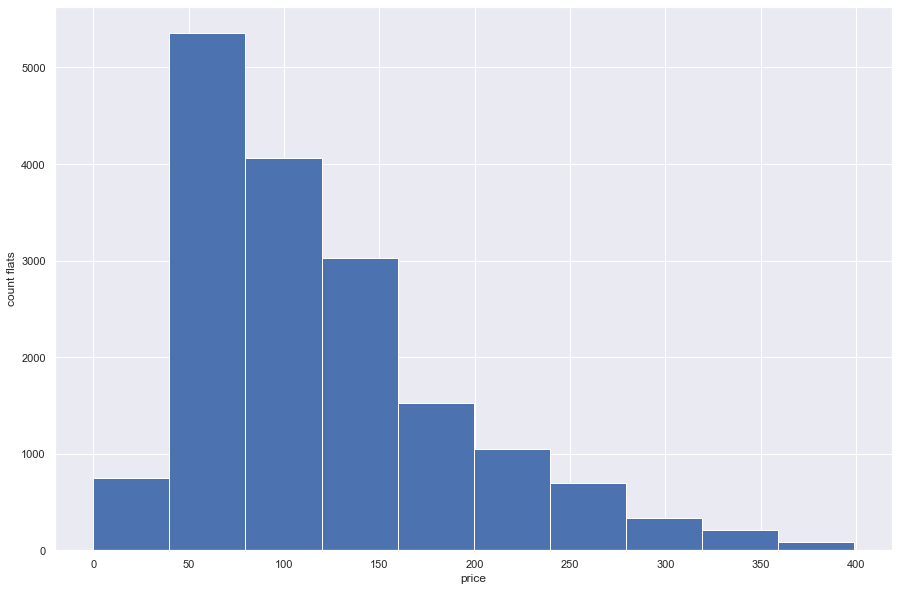

In [34]:
availible_apartments.loc[availible_apartments.price<400].\
    price.hist()
plt.xlabel('price')
plt.ylabel('count flats')

Как мы можем заметить, цена на такие квартиры варьируется в среднем от 50 до 150 долларов за ночь

Text(0, 0.5, 'count flats')

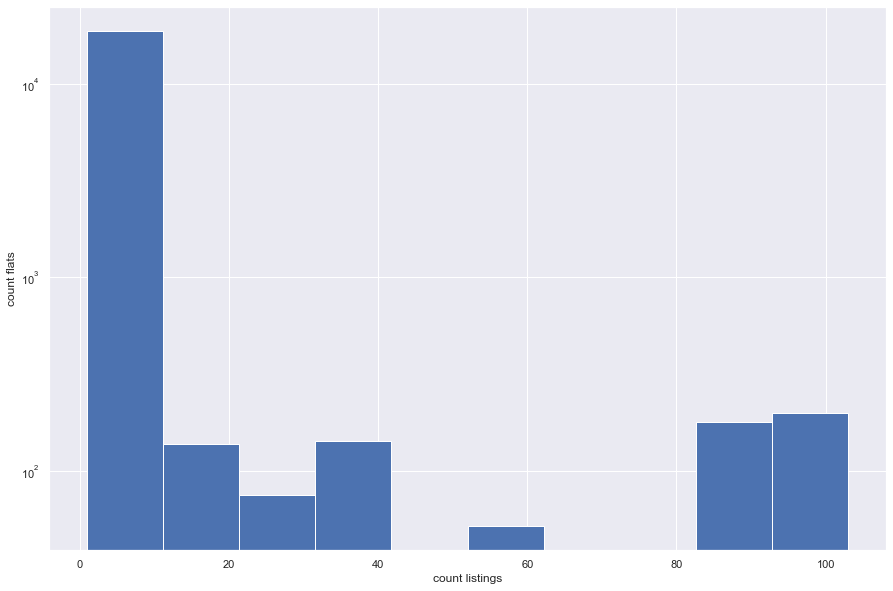

In [35]:
#Распределение количества вхождений того или иного количества броней
data.loc[data.host_id.isin(availible_apartments.host_id)].\
    calculated_host_listings_count.hist(log=True)
plt.xlabel('count listings')
plt.ylabel('count flats')

In [36]:
data.loc[data.host_id.isin(availible_apartments.host_id)].\
    calculated_host_listings_count.value_counts().head(10)

1      14910
2       2216
3        690
4        304
5        210
103      103
6        102
96        96
91        91
87        87
Name: calculated_host_listings_count, dtype: int64

По прежнему лидирует количество апартаментов с одним хозяином, однако можно заметить, что дисперсия количества значительно увеличилась. 85% жилья имеют лишь одного арендатора

In [37]:
#Было
np.var(data.loc[data.host_id.isin(availible_hosts.host_id)].\
       calculated_host_listings_count.value_counts().index)

11.109375

In [38]:
#Стало
np.var(data.loc[data.host_id.isin(availible_apartments.host_id)].\
       calculated_host_listings_count.value_counts().index)

889.3367346938776

Это говорит о том, что некоторые хосты имеют и занятые круглый год и свободные квартиры

## За какие квартиры наибольшее количество отзывов? Влияют ли отзывы на цену аренды?

Рассмотрим самые популярные по отзывам квартиры

In [39]:
top_review = data.sort_values(by='number_of_reviews').\
    iloc[-5:].reset_index(drop=True)
top_review

,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Room Near JFK Twin Beds,47621202,Queens,Jamaica,40.66939,-73.76975,Private room,47,1,576,13.40,2,173
1,Private Bedroom in Manhattan,4734398,Manhattan,Harlem,40.82264,-73.94041,Private room,49,1,594,7.57,3,339
2,Beautiful Bedroom in Manhattan,4734398,Manhattan,Harlem,40.82124,-73.93838,Private room,49,1,597,7.72,3,342
3,Great Bedroom in Manhattan,4734398,Manhattan,Harlem,40.82085,-73.94025,Private room,49,1,607,7.75,3,293
4,Room near JFK Queen Bed,47621202,Queens,Jamaica,40.66730,-73.76831,Private room,47,1,629,14.58,2,333


Мы можем заметить, что наиболее оцениваемые квартиры являются частными и по большей части располагаются в Манхеттене

Давайте посмотрим на среднюю стоимость таких квартир

In [40]:
top_review.price.mean()

48.2

Средняя цена в действительности не так велика, давайте взглянем на корреляцию между количеством отзывов и ценой апартаментов

In [41]:
np.corrcoef([data.number_of_reviews, data.price])

array([[ 1.        , -0.04795423],
       [-0.04795423,  1.        ]])

Коэффициент корреляции очень низкий, скорее всего эти переменные невзаимосвязаны

# Итоговые результаты и выводы

Наиболее важными оказались следующие зависимости:

1) Зависимость цены от местоположения

Данная зависимость показала, что цена зависит от района, в котором находится квартира, а так же от того, в какой части района она находится

Я считаю это поможет в предсказании цены апартаментов

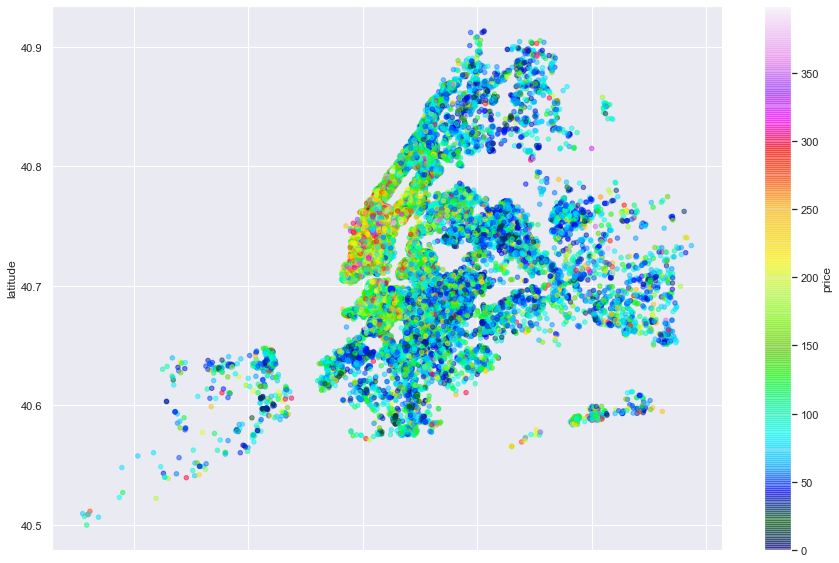

In [42]:
#First
data.loc[data.price < 400].plot(kind='scatter',
                                x='longitude',
                                y='latitude',
                                c='price',
                                cmap=plt.get_cmap('gist_ncar'),
                                alpha=0.5,
                                figsize=(15, 10))

2) Зависимость того, сколько дней в году свободна та или иная квартира, от количества ее владельцев

Данная зависсимость помогает понять, что некоторые апартаменты были куплены или арендованы на неопределенный срок, а значит цена на них будет зависеть только от расположения и состояния жилья

Это так же может помочь в предсказании цены на те или иные апартаменты

Text(0, 0.5, 'count flats')

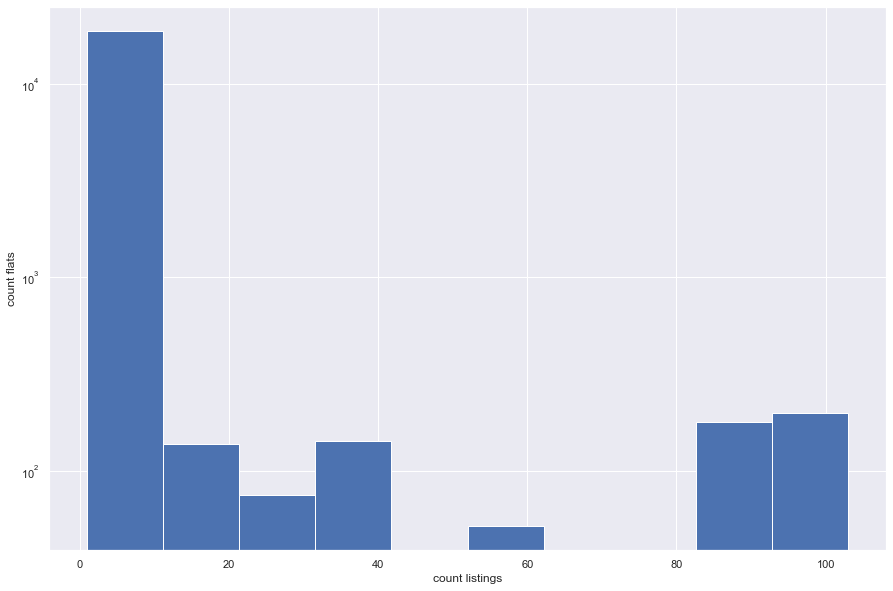

In [43]:
#Second
data.loc[data.host_id.isin(availible_apartments.host_id)].\
    calculated_host_listings_count.hist(log=True)
plt.xlabel('count listings')
plt.ylabel('count flats')

3) Зависимость минимального количества дней для аренды от типа жилья и его района, в котором оно расположено

Данная зависимость так же связана с тем, для чего жилье предназначенно, в большинстве случаев частные дома в Нью-Йорке можно арендовать только на продолжительный срок.
Это может нам помочь в предсказании того, на какое минимальное количество дней человек может арендовать ту или иную квартиру в нужном районе

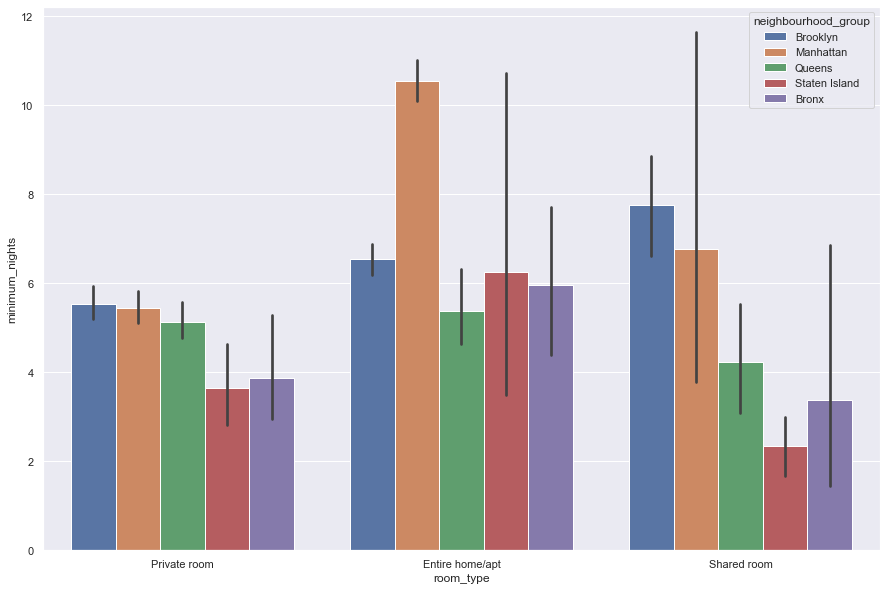

In [44]:
sns.barplot(x="room_type",
            y="minimum_nights",
            hue="neighbourhood_group",
            data=data)

**Выводы:**

1) Разведочный анализ данных показал, что жилье, расположенное в таких районах как Манхеттен и Квинс, самое востребованное, что отражается на его занятости в течение года и цене за ночь. Так мы определили, какие районы наиболее популярны для аренды жилья.

2) Была выдвинута гепотеза о том, что занятость жилья в вышеперечисленных районах связана с тем, что у них не меняется хозяин. Так, мы увидели, что в 85% случаев жилье имеет только одного арендатора.

3) Большинство наиболее популярных по количеству отзывов апартаментов - частные комнаты, само собой в Квинсе и Манхеттене. Возможно, это связано с тем, что они очень востребованны среди молодых пар.

4) В свою очередь, типы комнат имеют свои ограничения в виде минимального количества арендуемых дней. Так, например весь дом можно арендовать в среднем минимум на 7 дней, в то время как частную комнату только на 4 дня. Данная зависимость так же отражается на востребованности жилья, так как арендовать комнату проще, чем целый дом.


Данные зависимости можно применить для предсказания по имеющейся информации таких характеристик как популярности жилья, цены за ночь, минимального количества дней для аренды и количества броней у апартаментов